# Heat diffusion + advection

If we add advection and internal heat generation to our heat equation, we get

$$\rho C_p \left(\frac{\partial T}{\partial t} + v_x\frac{\partial T}{\partial x}\right) = k \frac{\partial^2 T}{\partial x^2} + H$$

Leaving only the time derivative on the left-hand side,

$$\frac{\partial T}{\partial t} = \frac{k}{\rho C_p} \frac{\partial^2 T}{\partial x^2} + \frac{H}{\rho C_p} - v_x\frac{\partial T}{\partial x}$$

## Do

 - Write the finite difference approximation for (i.e. *discretize*) the diffusion-advection equation. Use forward difference in time and central difference in space. Write the expression in form $T_i^{q+1} = \ldots~T^q~\mathrm{terms~only~on~this~side}~\ldots$
 - Modify the intrusion code below (or use the one you modified previously):
     - Add variables that store the internal heat production $H$ and the advection velocity $v_x$ (what are suitable values?)
     - Modify the line within the time loop that calculates the next valuer of $T$: include the terms for heat generation and advection
 - Start with $H=0$ and $v_x = 0$. Gradually change these values. How does the results change as you give non-zero values for these? What happens if $v_x > 0$ compared to $v_x < 0$? What if $v_x$ has a large (positive or negative) value?
 
 - Extra:
     - Remove the initial hot intrusion. Instead, add spatially variable internal heat generation. For this, you will need to introduce new numpy array (of size `nx`), fill it with values of internal heat generation, and use it (`H[ix]` instead of `H`) when you calculate the new temperature value.
     - Calculating heat flow:
        - Heat flow is defined as $q=k\frac{dT}{dx}$. Write an approximation for $q$ by replacing the derivative with a finite difference expression.
        - Modify the code so that you create an array (of size `nt`) that stores surface heat flow values each time step. Within the time loop, calculate each time step the heat flow between two topmost grid points.
        - After the time loop, plot the recorded surface heat flow history.

dx is 1206.896551724138 m
Calculating 10 time steps


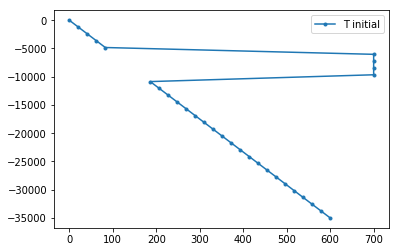

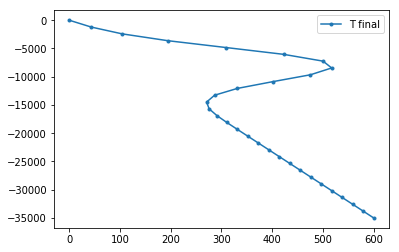

In [15]:
import numpy as np
import matplotlib.pyplot as plt

yr2sec = 60*60*24*365.25  # num of seconds in a year

# Set material properties
rho = 2900   # kg m^-3
Cp = 900     # J kg^-1 K^-1
k = 2.5      # W m^-1 K^-1

# Set geometry and dimensions
L = 35e3         # m
nx = 30          # -
dx = L / (nx-1)  # m
print("dx is", dx, "m")

silltop = 5e3    # m
sillbott = 10e3  # m

# Set total time and time step
t_total = 0.1e6 * yr2sec          # s
dt = 1e4 * yr2sec                 # s
nt = int(np.floor(t_total / dt))  # -
print("Calculating", nt, "time steps")

# Set boundary temperature values and intrusion temperature
Tsurf = 0.0        # deg C
Tmoho = 600.0      # deg C
Tintrusion = 700.0 # deg C

# Create arrays to hold temperature fields
Tnew = np.zeros(nx)
Tprev = np.zeros(nx)

# Create coordinates of the grid points
x = np.linspace(0, L, nx)

# Generate initial temperature field
for ix in range(nx):
    if (x[ix] < sillbott) and (x[ix] > silltop):
        Tprev[ix] = Tintrusion
    else:
        Tprev[ix] = x[ix] * (Tmoho - Tsurf) / L

# Plot initial temperature field
plt.plot(Tprev, -x, '.-', label='T initial')
plt.legend()
plt.show()

# Start the loop over time steps
curtime = 0
while curtime < t_total:
    curtime = curtime + dt
    
    # boundary conditions
    Tnew[0] = Tsurf
    Tnew[nx-1] = Tmoho
    
    # internal grid points
    for ix in range(1, nx-1):
        Tnew[ix] = (k * (Tprev[ix-1] - 2.0*Tprev[ix] + Tprev[ix+1]) / dx**2) * dt / (rho * Cp) + Tprev[ix]
        
    # copy Tnew to Tprev
    Tprev[:] = Tnew[:]
    

# Plot the final temperature field
plt.plot(Tnew, -x, '.-', label='T final')
plt.legend()
plt.show()
